In [1]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 62.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('data.parquet')

In [3]:
df

,date,ric,time,side,qty,price
0,2018-01-02,CLI.N,3.450004e+13,-1,100,39.11
1,2018-01-02,CLI.N,3.450004e+13,1,200,39.11
2,2018-01-02,CLI.N,3.450004e+13,-1,37,39.11
3,2018-01-02,TXRH.OQ,3.450016e+13,1,2,49.10
4,2018-01-02,TXRH.OQ,3.450016e+13,1,12,49.10
...,...,...,...,...,...,...
2010830,2018-01-31,GCBC.OQ,5.669966e+13,-1,5,47.44
2010831,2018-01-31,RGS.N,5.669975e+13,1,100,27.67
2010832,2018-01-31,WGL.N,5.669998e+13,1,100,37.57
2010833,2018-01-31,WGL.N,5.669998e+13,1,100,37.57


In [4]:
df['prevside'] = df.groupby(['date', 'ric'])['side'].shift(1)

In [5]:
df.drop(columns=["date", "ric"]).corr()

,time,side,qty,price,prevside
time,1.000000,0.003744,0.013297,0.052956,0.003732
side,0.003744,1.000000,-0.000742,-0.000375,0.427727
qty,0.013297,-0.000742,1.000000,-0.101388,0.003302
price,0.052956,-0.000375,-0.101388,1.000000,-0.000393
prevside,0.003732,0.427727,0.003302,-0.000393,1.000000


In [6]:
N = 5000*10**9

In [7]:
df['bucket'] = df['time']-df['time']%N

In [8]:
df

,date,ric,time,side,qty,price,prevside,bucket
0,2018-01-02,CLI.N,3.450004e+13,-1,100,39.11,NaN,3.000000e+13
1,2018-01-02,CLI.N,3.450004e+13,1,200,39.11,-1.0,3.000000e+13
2,2018-01-02,CLI.N,3.450004e+13,-1,37,39.11,1.0,3.000000e+13
3,2018-01-02,TXRH.OQ,3.450016e+13,1,2,49.10,NaN,3.000000e+13
4,2018-01-02,TXRH.OQ,3.450016e+13,1,12,49.10,1.0,3.000000e+13
...,...,...,...,...,...,...,...,...
2010830,2018-01-31,GCBC.OQ,5.669966e+13,-1,5,47.44,-1.0,5.500000e+13
2010831,2018-01-31,RGS.N,5.669975e+13,1,100,27.67,-1.0,5.500000e+13
2010832,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,-1.0,5.500000e+13
2010833,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,1.0,5.500000e+13


In [9]:
df['nettraded'] = df['side']*df['qty']*df['price']

In [10]:
df.groupby(['date', 'ric', 'bucket']).sum().reset_index()

,date,ric,bucket,time,side,qty,price,prevside,nettraded
0,2018-01-02,AAXN.OQ,3.000000e+13,1.392233e+14,0,300,166.20,1.0,-4170.00
1,2018-01-02,AAXN.OQ,3.500000e+13,2.144826e+15,-1,4543,2342.80,-1.0,14250.05
2,2018-01-02,AAXN.OQ,4.000000e+13,1.932681e+15,-10,3138,1885.60,-10.0,-27811.30
3,2018-01-02,AAXN.OQ,4.500000e+13,2.180769e+15,-22,3970,1884.60,-22.0,-80143.50
4,2018-01-02,AAXN.OQ,5.000000e+13,3.137789e+15,-33,5090,2405.15,-35.0,-127095.50
...,...,...,...,...,...,...,...,...,...
11370,2018-01-31,XEC.N,3.500000e+13,5.838219e+15,-49,11836,2967.76,-49.0,-46451.48
11371,2018-01-31,XEC.N,4.000000e+13,9.066132e+15,-56,20786,4160.22,-56.0,-82345.58
11372,2018-01-31,XEC.N,4.500000e+13,3.856838e+15,21,7160,1562.58,21.0,23597.83
11373,2018-01-31,XEC.N,5.000000e+13,8.205378e+15,-33,13069,2991.81,-33.0,19624.73


In [11]:
for k in range(10):
    df[f'prevnettraded{k}'] = df.groupby(['date', 'ric'])['nettraded'].shift(k)

In [12]:
df.drop(columns=["date", "ric"]).corr()

,time,side,qty,price,prevside,bucket,nettraded,prevnettraded0,prevnettraded1,prevnettraded2,prevnettraded3,prevnettraded4,prevnettraded5,prevnettraded6,prevnettraded7,prevnettraded8,prevnettraded9
time,1.000000,0.003744,0.013297,0.052956,0.003732,0.978080,-0.001238,-0.001238,-0.001257,-0.001270,-0.001323,-0.001292,-0.001286,-0.001265,-0.001282,-0.001312,-0.001318
side,0.003744,1.000000,-0.000742,-0.000375,0.427727,0.002807,0.442892,0.442892,0.207402,0.122728,0.080607,0.054321,0.038095,0.028284,0.022027,0.015514,0.013855
qty,0.013297,-0.000742,1.000000,-0.101388,0.003302,0.014063,-0.157438,-0.157438,0.004807,0.002159,0.001028,0.002741,0.001299,0.000654,-0.000077,-0.004039,0.001458
price,0.052956,-0.000375,-0.101388,1.000000,-0.000393,0.053571,0.006397,0.006397,0.006407,0.006504,0.006328,0.006320,0.006239,0.006386,0.006406,0.006437,0.006392
prevside,0.003732,0.427727,0.003302,-0.000393,1.000000,0.002798,0.175719,0.175719,0.442814,0.207369,0.122717,0.080569,0.054300,0.038107,0.028300,0.022040,0.015517
bucket,0.978080,0.002807,0.014063,0.053571,0.002798,1.000000,-0.001478,-0.001478,-0.001521,-0.001503,-0.001533,-0.001514,-0.001470,-0.001433,-0.001433,-0.001455,-0.001449
nettraded,-0.001238,0.442892,-0.157438,0.006397,0.175719,-0.001478,1.000000,1.000000,0.133185,0.078232,0.048701,0.031659,0.022159,0.014564,0.014617,0.015180,0.007922
prevnettraded0,-0.001238,0.442892,-0.157438,0.006397,0.175719,-0.001478,1.000000,1.000000,0.133185,0.078232,0.048701,0.031659,0.022159,0.014564,0.014617,0.015180,0.007922
prevnettraded1,-0.001257,0.207402,0.004807,0.006407,0.442814,-0.001521,0.133185,0.133185,1.000000,0.133094,0.078227,0.048680,0.031666,0.022193,0.014614,0.014636,0.015195
prevnettraded2,-0.001270,0.122728,0.002159,0.006504,0.207369,-0.001503,0.078232,0.078232,0.133094,1.000000,0.133100,0.078219,0.048699,0.031634,0.022196,0.014619,0.014679


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X, y = df.dropna()[[f"prevnettraded{k}" for k in range(1, 10)]], df.dropna()["nettraded"]
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_
coefs

array([0.12179905, 0.05584487, 0.02817419, 0.0151904 , 0.00969475,
       0.00445535, 0.00720362, 0.00943387, 0.00216277])

In [15]:
import numpy as np

prop = 1 - np.cumsum(np.insert(coefs, 0, 0))
prop

array([1.        , 0.87820095, 0.82235608, 0.79418189, 0.7789915 ,
       0.76929675, 0.7648414 , 0.75763777, 0.7482039 , 0.74604113])

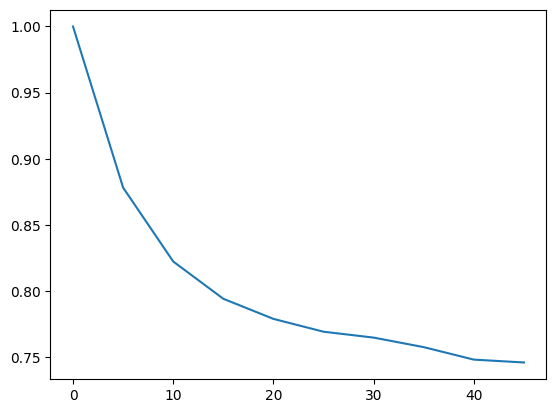

In [16]:
import matplotlib.pyplot as plt
plt.plot([5*i for i in range(len(prop))], prop)

In [17]:
df['absnettraded'] = abs(df['nettraded'])

In [18]:
df_2 = df.groupby(['date', 'ric']).sum()['absnettraded'].reset_index()
df_2

,date,ric,absnettraded
0,2018-01-02,AAXN.OQ,832044.75
1,2018-01-02,ABAX.OQ,1211754.80
2,2018-01-02,ABMD.OQ,2241014.44
3,2018-01-02,ALRM.OQ,24014921.05
4,2018-01-02,AMG.N,3988139.02
...,...,...,...
1948,2018-01-31,VOYA.N,22293905.13
1949,2018-01-31,WDR.N,446237.00
1950,2018-01-31,WETF.OQ,1745927.52
1951,2018-01-31,WGL.N,3912556.15


In [19]:
for i in range(6):
    df_2[f'absnettraded{i}'] = df_2.groupby(['ric'])['absnettraded'].shift(i)

In [20]:
df_2.dropna()

,date,ric,absnettraded,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5
465,2018-01-09,AAXN.OQ,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75
466,2018-01-09,ABAX.OQ,3458172.82,3458172.82,2244671.88,1486796.49,2645484.86,1715616.26,1211754.80
467,2018-01-09,ABMD.OQ,2306708.90,2306708.90,1995287.49,1882327.27,2379716.12,3473663.11,2241014.44
468,2018-01-09,ALRM.OQ,19829661.86,19829661.86,44184486.64,17864621.29,20047067.52,32970045.92,24014921.05
469,2018-01-09,AMG.N,3945673.57,3945673.57,6000827.26,3771434.48,3700672.65,5630882.72,3988139.02
...,...,...,...,...,...,...,...,...,...
1948,2018-01-31,VOYA.N,22293905.13,22293905.13,22814977.86,7468984.14,6130316.00,13560821.60,20998043.51
1949,2018-01-31,WDR.N,446237.00,446237.00,703695.90,655949.80,160646.45,588301.45,768618.85
1950,2018-01-31,WETF.OQ,1745927.52,1745927.52,3477583.20,596082.31,917188.50,1327358.57,894280.39
1951,2018-01-31,WGL.N,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94


In [21]:
df_2['normalizer'] =  df_2['absnettraded1'] + df_2['absnettraded2'] + df_2['absnettraded3'] + df_2['absnettraded4'] + df_2['absnettraded5']

In [22]:
df_2.dropna().sort_values(["ric", "date"])

,date,ric,absnettraded,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer
465,2018-01-09,AAXN.OQ,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
558,2018-01-10,AAXN.OQ,1146250.20,1146250.20,803520.05,623051.25,687092.85,1069505.00,757481.75,3940650.90
651,2018-01-11,AAXN.OQ,644569.20,644569.20,1146250.20,803520.05,623051.25,687092.85,1069505.00,4329419.35
744,2018-01-12,AAXN.OQ,370268.60,370268.60,644569.20,1146250.20,803520.05,623051.25,687092.85,3904483.55
837,2018-01-16,AAXN.OQ,684364.30,684364.30,370268.60,644569.20,1146250.20,803520.05,623051.25,3587659.30
...,...,...,...,...,...,...,...,...,...,...
1580,2018-01-25,XEC.N,1058435.25,1058435.25,1805358.75,1223995.21,884096.09,896338.53,442549.76,5252338.34
1673,2018-01-26,XEC.N,634332.72,634332.72,1058435.25,1805358.75,1223995.21,884096.09,896338.53,5868223.83
1766,2018-01-29,XEC.N,654029.58,654029.58,634332.72,1058435.25,1805358.75,1223995.21,884096.09,5606218.02
1859,2018-01-30,XEC.N,1390392.22,1390392.22,654029.58,634332.72,1058435.25,1805358.75,1223995.21,5376151.51


In [23]:
df_2.dropna()

,date,ric,absnettraded,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer
465,2018-01-09,AAXN.OQ,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3.969176e+06
466,2018-01-09,ABAX.OQ,3458172.82,3458172.82,2244671.88,1486796.49,2645484.86,1715616.26,1211754.80,9.304324e+06
467,2018-01-09,ABMD.OQ,2306708.90,2306708.90,1995287.49,1882327.27,2379716.12,3473663.11,2241014.44,1.197201e+07
468,2018-01-09,ALRM.OQ,19829661.86,19829661.86,44184486.64,17864621.29,20047067.52,32970045.92,24014921.05,1.390811e+08
469,2018-01-09,AMG.N,3945673.57,3945673.57,6000827.26,3771434.48,3700672.65,5630882.72,3988139.02,2.309196e+07
...,...,...,...,...,...,...,...,...,...,...
1948,2018-01-31,VOYA.N,22293905.13,22293905.13,22814977.86,7468984.14,6130316.00,13560821.60,20998043.51,7.097314e+07
1949,2018-01-31,WDR.N,446237.00,446237.00,703695.90,655949.80,160646.45,588301.45,768618.85,2.877212e+06
1950,2018-01-31,WETF.OQ,1745927.52,1745927.52,3477583.20,596082.31,917188.50,1327358.57,894280.39,7.212493e+06
1951,2018-01-31,WGL.N,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94,2.992593e+07


In [24]:
df_merged = df.merge(df_2, on = ['date', 'ric'], how = 'left')
df_merged.dropna().sort_values(['ric', 'date'])

,date,ric,time,side,qty,price,prevside,bucket,nettraded,prevnettraded0,...,prevnettraded9,absnettraded_x,absnettraded_y,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer
566485,2018-01-09,AAXN.OQ,3.476205e+13,1,49,40.75,1.0,3.000000e+13,1996.75,1996.75,...,-2557.50,1996.75,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
566486,2018-01-09,AAXN.OQ,3.476207e+13,1,700,40.95,1.0,3.000000e+13,28665.00,28665.00,...,-5692.50,28665.00,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
570559,2018-01-09,AAXN.OQ,3.552402e+13,-1,7,40.95,1.0,3.500000e+13,-286.65,-286.65,...,-4115.00,286.65,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
570560,2018-01-09,AAXN.OQ,3.552402e+13,-1,93,40.95,-1.0,3.500000e+13,-3808.35,-3808.35,...,-4110.00,3808.35,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
572125,2018-01-09,AAXN.OQ,3.584865e+13,1,100,40.00,-1.0,3.500000e+13,4000.00,4000.00,...,-4110.00,4000.00,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009788,2018-01-31,XEC.N,5.659099e+13,1,22,19.60,1.0,5.500000e+13,431.20,431.20,...,1901.00,431.20,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52
2009789,2018-01-31,XEC.N,5.659099e+13,-1,99,19.59,1.0,5.500000e+13,-1939.41,-1939.41,...,1253.12,1939.41,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52
2009954,2018-01-31,XEC.N,5.660598e+13,1,100,19.60,-1.0,5.500000e+13,1960.00,1960.00,...,-1901.00,1960.00,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52
2009955,2018-01-31,XEC.N,5.660598e+13,1,22,19.60,1.0,5.500000e+13,431.20,431.20,...,-57.03,431.20,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52


In [25]:
df_merged['normalizednettraded'] = df_merged['nettraded'] / df_merged['normalizer']
df_merged

,date,ric,time,side,qty,price,prevside,bucket,nettraded,prevnettraded0,...,absnettraded_x,absnettraded_y,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer,normalizednettraded
0,2018-01-02,CLI.N,3.450004e+13,-1,100,39.11,NaN,3.000000e+13,-3911.00,-3911.00,...,3911.00,6483909.62,6483909.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,CLI.N,3.450004e+13,1,200,39.11,-1.0,3.000000e+13,7822.00,7822.00,...,7822.00,6483909.62,6483909.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,CLI.N,3.450004e+13,-1,37,39.11,1.0,3.000000e+13,-1447.07,-1447.07,...,1447.07,6483909.62,6483909.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-02,TXRH.OQ,3.450016e+13,1,2,49.10,NaN,3.000000e+13,98.20,98.20,...,98.20,12020471.84,12020471.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02,TXRH.OQ,3.450016e+13,1,12,49.10,1.0,3.000000e+13,589.20,589.20,...,589.20,12020471.84,12020471.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010830,2018-01-31,GCBC.OQ,5.669966e+13,-1,5,47.44,-1.0,5.500000e+13,-237.20,-237.20,...,237.20,7023708.45,7023708.45,4615522.99,1986356.61,2022616.88,5141842.82,3574776.56,17341115.86,-0.000014
2010831,2018-01-31,RGS.N,5.669975e+13,1,100,27.67,-1.0,5.500000e+13,2767.00,2767.00,...,2767.00,8269182.31,8269182.31,10602236.12,6565547.84,10266956.36,10788024.90,10265154.15,48487919.37,0.000057
2010832,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,-1.0,5.500000e+13,3757.00,3757.00,...,3757.00,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94,29925928.67,0.000126
2010833,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,1.0,5.500000e+13,3757.00,3757.00,...,3757.00,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94,29925928.67,0.000126


In [26]:
for i in range(10):
    df_merged[f'prevnettradednormalized{i}'] = df_merged[f'prevnettraded{i}']/df_merged['normalizer']


In [27]:
X, y = df_merged.dropna()[[f"prevnettradednormalized{k}" for k in range(1, 10)]], df_merged.dropna()["normalizednettraded"]
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_
coefs

array([0.1678741 , 0.08872598, 0.02579302, 0.00995647, 0.03819733,
       0.03661447, 0.0271341 , 0.00957545, 0.01482519])

In [28]:
prop_normalized = 1 - np.cumsum(np.insert(coefs, 0, 0))
prop_normalized

array([1.        , 0.8321259 , 0.74339992, 0.7176069 , 0.70765043,
       0.6694531 , 0.63283863, 0.60570453, 0.59612909, 0.5813039 ])

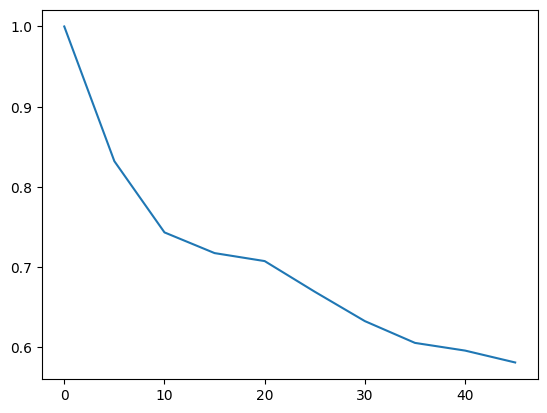

In [29]:
plt.plot([5*i for i in range(len(prop_normalized))], prop_normalized)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

In [31]:
from sklearn import model_selection

X, y = df.dropna()[[f"prevnettraded{k}" for k in range(1, 10)]], df.dropna()["nettraded"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X , y, test_size=0.30, random_state=4)

In [32]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.019417744500912493

Bucket 1 minutes : R² = -0.0103
Bucket 2 minutes : R² = -0.0034
Bucket 3 minutes : R² = -0.0010
Bucket 4 minutes : R² = -0.0272
Bucket 5 minutes : R² = 0.0019
Bucket 6 minutes : R² = 0.0096
Bucket 7 minutes : R² = 0.0175
Bucket 8 minutes : R² = 0.0058
Bucket 9 minutes : R² = 0.0197
Bucket 10 minutes : R² = -0.0308
Bucket 11 minutes : R² = 0.0280
Bucket 12 minutes : R² = 0.0079
Bucket 13 minutes : R² = -0.0237
Bucket 14 minutes : R² = -0.0237
Bucket 15 minutes : R² = 0.0017
Bucket 16 minutes : R² = 0.0189
Bucket 17 minutes : R² = -0.0091
Bucket 18 minutes : R² = -0.0305
Bucket 19 minutes : R² = -0.1245
Bucket 20 minutes : R² = -0.0231
Bucket 21 minutes : R² = -0.0431
Bucket 22 minutes : R² = -0.0766
Bucket 23 minutes : R² = -0.2674
Bucket 24 minutes : R² = -0.1488
Bucket 25 minutes : R² = -0.1950
Bucket 26 minutes : R² = -0.2775
Bucket 27 minutes : R² = -0.1848
Bucket 28 minutes : R² = -0.1584
Bucket 29 minutes : R² = -0.1608
Bucket 30 minutes : R² = -0.1534
Bucket 31 minutes : R² = -0.

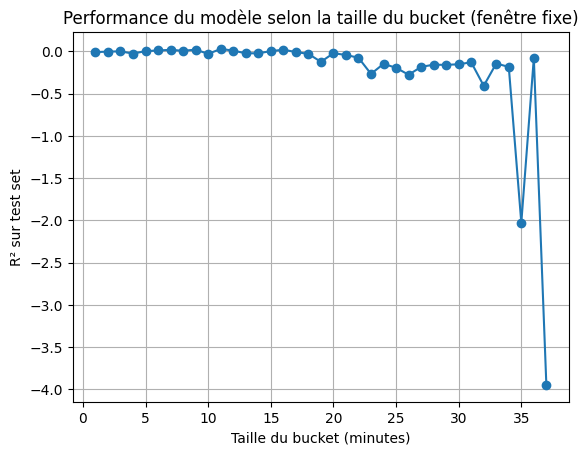

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

results = []

cutoff_datetime = pd.to_datetime("2018-01-26 14:55")

df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['time'], unit='ns')

df_filtered = df[(df['datetime'] < cutoff_datetime) & (df['datetime'].dt.date == cutoff_datetime.date())].copy()

for minutes in range(1, 41):  # Buckets de 1 à 10 minutes
    N = minutes * 60 * 10**9  # nanosecondes

    df_temp = df_filtered.copy()
    df_temp['bucket'] = df_temp['time'] - df_temp['time'] % N
    df_temp['nettraded'] = df_temp['side'] * df_temp['qty'] * df_temp['price']

    # Supprimer 'datetime' pour éviter l'erreur lors de groupby.sum()
    if 'datetime' in df_temp.columns:
        df_temp = df_temp.drop(columns='datetime')

    grouped = df_temp.groupby(['date', 'ric', 'bucket']).sum().reset_index()

    for k in range(10):
        grouped[f'prevnettraded{k}'] = grouped.groupby(['date', 'ric'])['nettraded'].shift(k)

    grouped['absnettraded'] = grouped['nettraded'].abs()
    grouped['normalizer'] = grouped.groupby(['date', 'ric'])['absnettraded'].transform(
        lambda x: x.shift(1).rolling(5).sum()
    )
    grouped['normalizednettraded'] = grouped['nettraded'] / grouped['normalizer']

    for i in range(10):
        grouped[f'prevnettradednormalized{i}'] = grouped[f'prevnettraded{i}'] / grouped['normalizer']

    data = grouped.dropna()
    if len(data) < 10:
        print(f"Bucket {minutes} minutes ignoré (seulement {len(data)} échantillons)")
        continue

    X = data[[f'prevnettradednormalized{k}' for k in range(1, 10)]]
    y = data['normalizednettraded']

    data_sorted = data.sort_values('bucket')
    split_index = int(0.7 * len(data_sorted))
    X_train = X.iloc[:split_index]
    y_train = y.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_test = y.iloc[split_index:]

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append((minutes, r2))
    print(f"Bucket {minutes} minutes : R² = {r2:.4f}")

if results:
    bucket_lengths, r2_scores = zip(*results)
    plt.plot(bucket_lengths, r2_scores, marker='o')
    plt.xlabel("Taille du bucket (minutes)")
    plt.ylabel("R² sur test set")
    plt.title("Performance du modèle selon la taille du bucket (fenêtre fixe)")
    plt.grid(True)
    plt.show()
else:
    print("Aucun résultat disponible (pas assez de données).")

Résultats pour l'heure 9:30-10:30
Bucket 3 minutes ignoré (seulement 0 échantillons)
Bucket 4 minutes ignoré (seulement 0 échantillons)
Bucket 5 minutes ignoré (seulement 0 échantillons)
Bucket 6 minutes ignoré (seulement 0 échantillons)
Bucket 7 minutes ignoré (seulement 0 échantillons)
Bucket 8 minutes ignoré (seulement 0 échantillons)
Bucket 9 minutes ignoré (seulement 0 échantillons)
Bucket 10 minutes ignoré (seulement 0 échantillons)
Bucket 11 minutes ignoré (seulement 0 échantillons)
Bucket 12 minutes ignoré (seulement 0 échantillons)
Bucket 13 minutes ignoré (seulement 0 échantillons)
Bucket 14 minutes ignoré (seulement 0 échantillons)
Bucket 15 minutes ignoré (seulement 0 échantillons)
Bucket 16 minutes ignoré (seulement 0 échantillons)
Bucket 17 minutes ignoré (seulement 0 échantillons)
Bucket 18 minutes ignoré (seulement 0 échantillons)
Bucket 19 minutes ignoré (seulement 0 échantillons)
Bucket 20 minutes ignoré (seulement 0 échantillons)
Bucket 21 minutes ignoré (seulement 0

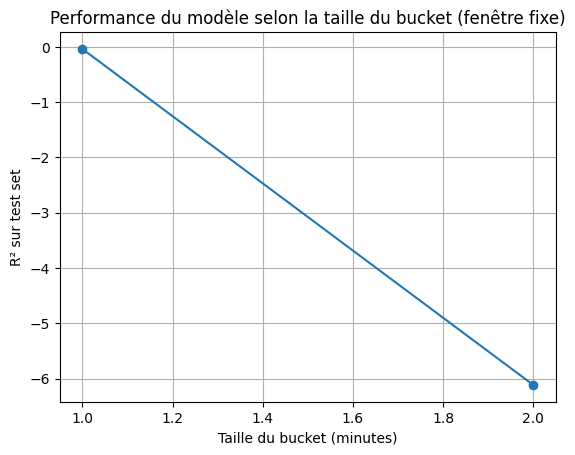

Résultats pour l'heure 10:30-11:30
Bucket 10 minutes ignoré (seulement 0 échantillons)
Bucket 11 minutes ignoré (seulement 0 échantillons)
Bucket 12 minutes ignoré (seulement 0 échantillons)
Bucket 13 minutes ignoré (seulement 0 échantillons)
Bucket 14 minutes ignoré (seulement 0 échantillons)
Bucket 15 minutes ignoré (seulement 0 échantillons)
Bucket 16 minutes ignoré (seulement 0 échantillons)
Bucket 17 minutes ignoré (seulement 0 échantillons)
Bucket 18 minutes ignoré (seulement 0 échantillons)
Bucket 19 minutes ignoré (seulement 0 échantillons)
Bucket 20 minutes ignoré (seulement 0 échantillons)
Bucket 21 minutes ignoré (seulement 0 échantillons)
Bucket 22 minutes ignoré (seulement 0 échantillons)
Bucket 23 minutes ignoré (seulement 0 échantillons)
Bucket 24 minutes ignoré (seulement 0 échantillons)
Bucket 25 minutes ignoré (seulement 0 échantillons)
Bucket 26 minutes ignoré (seulement 0 échantillons)
Bucket 27 minutes ignoré (seulement 0 échantillons)
Bucket 28 minutes ignoré (seu

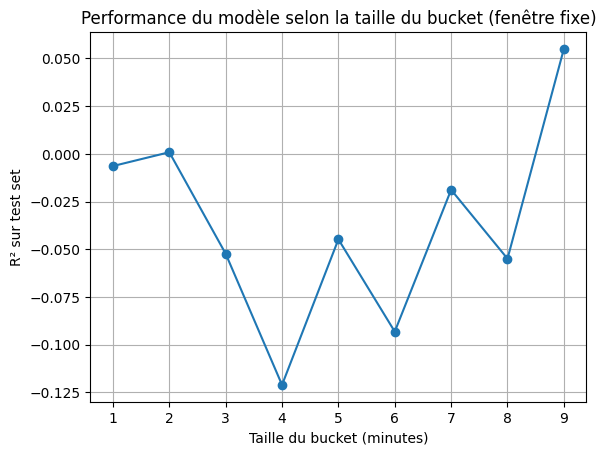

Résultats pour l'heure 11:30-12:30
Bucket 18 minutes ignoré (seulement 0 échantillons)
Bucket 19 minutes ignoré (seulement 0 échantillons)
Bucket 20 minutes ignoré (seulement 0 échantillons)
Bucket 21 minutes ignoré (seulement 0 échantillons)
Bucket 22 minutes ignoré (seulement 0 échantillons)
Bucket 23 minutes ignoré (seulement 0 échantillons)
Bucket 24 minutes ignoré (seulement 0 échantillons)
Bucket 25 minutes ignoré (seulement 0 échantillons)
Bucket 26 minutes ignoré (seulement 0 échantillons)
Bucket 27 minutes ignoré (seulement 0 échantillons)
Bucket 28 minutes ignoré (seulement 0 échantillons)
Bucket 29 minutes ignoré (seulement 0 échantillons)
Bucket 30 minutes ignoré (seulement 0 échantillons)
Bucket 31 minutes ignoré (seulement 0 échantillons)
Bucket 32 minutes ignoré (seulement 0 échantillons)
Bucket 33 minutes ignoré (seulement 0 échantillons)
Bucket 34 minutes ignoré (seulement 0 échantillons)
Bucket 35 minutes ignoré (seulement 0 échantillons)
Bucket 36 minutes ignoré (seu

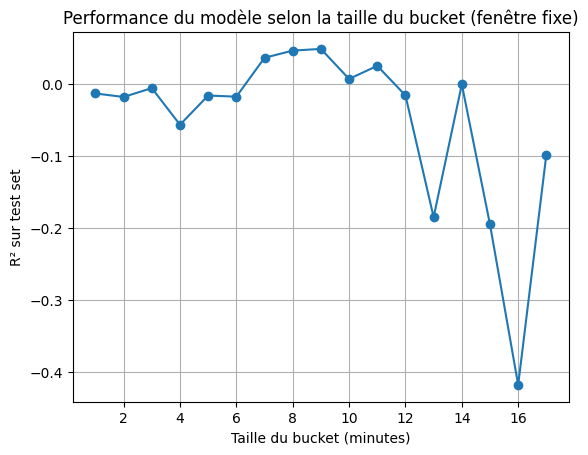

Résultats pour l'heure 12:30-13:30
Bucket 23 minutes ignoré (seulement 0 échantillons)
Bucket 25 minutes ignoré (seulement 0 échantillons)
Bucket 26 minutes ignoré (seulement 0 échantillons)
Bucket 27 minutes ignoré (seulement 0 échantillons)
Bucket 28 minutes ignoré (seulement 0 échantillons)
Bucket 29 minutes ignoré (seulement 0 échantillons)
Bucket 30 minutes ignoré (seulement 0 échantillons)
Bucket 31 minutes ignoré (seulement 0 échantillons)
Bucket 32 minutes ignoré (seulement 0 échantillons)
Bucket 33 minutes ignoré (seulement 0 échantillons)
Bucket 34 minutes ignoré (seulement 0 échantillons)
Bucket 35 minutes ignoré (seulement 0 échantillons)
Bucket 36 minutes ignoré (seulement 0 échantillons)
Bucket 37 minutes ignoré (seulement 0 échantillons)
Bucket 38 minutes ignoré (seulement 0 échantillons)
Bucket 39 minutes ignoré (seulement 0 échantillons)
Bucket 40 minutes ignoré (seulement 0 échantillons)


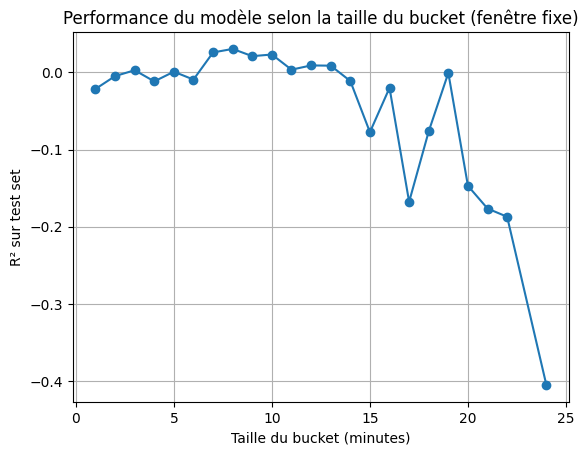

Résultats pour l'heure 13:30-14:30
Bucket 30 minutes ignoré (seulement 0 échantillons)
Bucket 33 minutes ignoré (seulement 0 échantillons)
Bucket 34 minutes ignoré (seulement 0 échantillons)
Bucket 35 minutes ignoré (seulement 0 échantillons)
Bucket 36 minutes ignoré (seulement 0 échantillons)
Bucket 37 minutes ignoré (seulement 0 échantillons)
Bucket 38 minutes ignoré (seulement 0 échantillons)
Bucket 39 minutes ignoré (seulement 0 échantillons)
Bucket 40 minutes ignoré (seulement 0 échantillons)


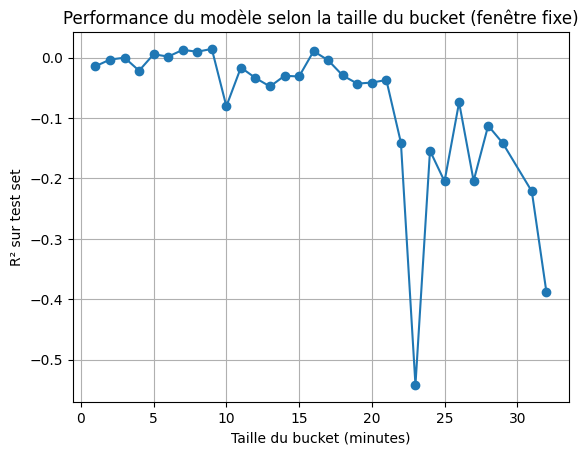

Résultats pour l'heure 14:30-15:30
Bucket 38 minutes ignoré (seulement 0 échantillons)
Bucket 40 minutes ignoré (seulement 0 échantillons)


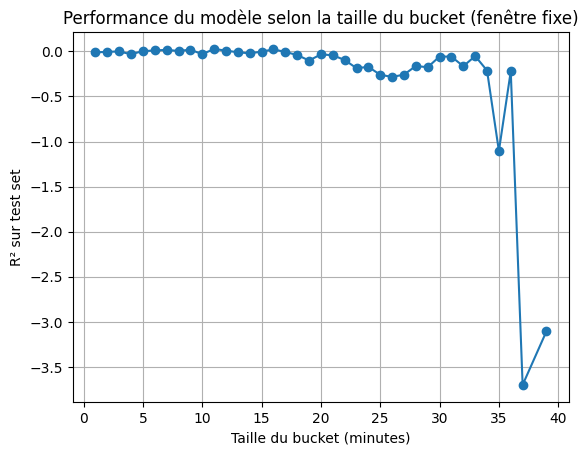

Résultats pour l'heure 15:30-16:30


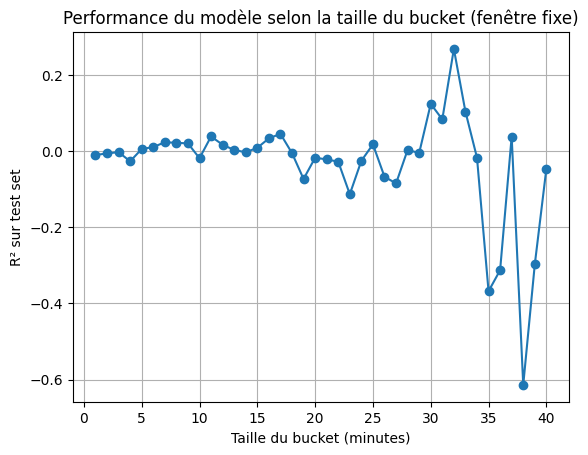

Résultats pour l'heure 16:30-17:30


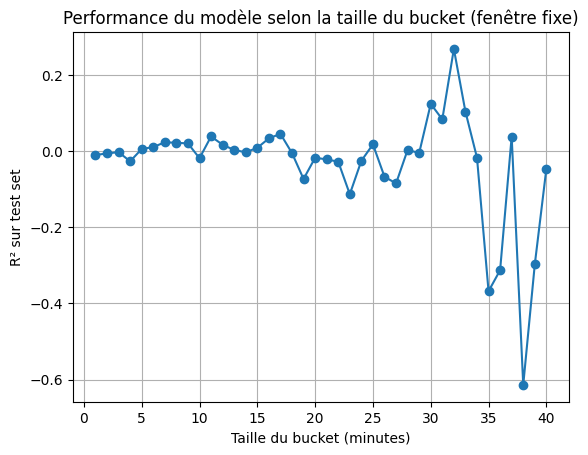

In [97]:
from sklearn import linear_model

for i in range(10,18):
    results = []
    print(f"Résultats pour l'heure {(i-1)}:30-{i}:30")

    cutoff_datetime = pd.to_datetime("2018-01-26" f'{i:30}')
    
    df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['time'], unit='ns')

    df_filtered = df[(df['datetime'] < cutoff_datetime) & (df['datetime'].dt.date == cutoff_datetime.date())].copy()

    for minutes in range(1, 41):  # Buckets de 1 à 10 minutes
        N = minutes * 60 * 10**9  # nanosecondes

        df_temp = df_filtered.copy()
        df_temp['bucket'] = df_temp['time'] - df_temp['time'] % N
        df_temp['nettraded'] = df_temp['side'] * df_temp['qty'] * df_temp['price']

        # Supprimer 'datetime' pour éviter l'erreur lors de groupby.sum()
        if 'datetime' in df_temp.columns:
            df_temp = df_temp.drop(columns='datetime')

        grouped = df_temp.groupby(['date', 'ric', 'bucket']).sum().reset_index()

        for k in range(10):
            grouped[f'prevnettraded{k}'] = grouped.groupby(['date', 'ric'])['nettraded'].shift(k)

        grouped['absnettraded'] = grouped['nettraded'].abs()
        grouped['normalizer'] = grouped.groupby(['date', 'ric'])['absnettraded'].transform(
        lambda x: x.shift(1).rolling(5).sum()
        )
        grouped['normalizednettraded'] = grouped['nettraded'] / grouped['normalizer']

        for i in range(10):
            grouped[f'prevnettradednormalized{i}'] = grouped[f'prevnettraded{i}'] / grouped['normalizer']

        data = grouped.dropna()
        if len(data) < 10:
            print(f"Bucket {minutes} minutes ignoré (seulement {len(data)} échantillons)")
            continue

        X = data[[f'prevnettradednormalized{k}' for k in range(1, 10)]]
        y = data['normalizednettraded']

        data_sorted = data.sort_values('bucket')
        split_index = int(0.7 * len(data_sorted))
        X_train = X.iloc[:split_index]
        y_train = y.iloc[:split_index]
        X_test = X.iloc[split_index:]
        y_test = y.iloc[split_index:]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', Ridge())
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results.append((minutes, r2))

    if results:
        bucket_lengths, r2_scores = zip(*results)
        plt.plot(bucket_lengths, r2_scores, marker='o')
        plt.xlabel("Taille du bucket (minutes)")
        plt.ylabel("R² sur test set")
        plt.title("Performance du modèle selon la taille du bucket (fenêtre fixe)")
        plt.grid(True)
        plt.show()
    else:
        print("Aucun résultat disponible (pas assez de données).")

In [128]:
from sklearn import linear_model

optimal_bucket_r2_score = []
optimal_r2_score = []

for i in range(10,18):
    results = []
    print(f"Résultats pour l'heure {(i-1)}:30-{i}:30")

    cutoff_datetime = pd.to_datetime("2018-01-26" f'{i:30}')
    
    df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['time'], unit='ns')

    df_filtered = df[(df['datetime'] < cutoff_datetime) & (df['datetime'].dt.date == cutoff_datetime.date())].copy()

    for minutes in range(1, 41):  # Buckets de 1 à 10 minutes
        N = minutes * 60 * 10**9  # nanosecondes

        df_temp = df_filtered.copy()
        df_temp['bucket'] = df_temp['time'] - df_temp['time'] % N
        df_temp['nettraded'] = df_temp['side'] * df_temp['qty'] * df_temp['price']

        # Supprimer 'datetime' pour éviter l'erreur lors de groupby.sum()
        if 'datetime' in df_temp.columns:
            df_temp = df_temp.drop(columns='datetime')

        grouped = df_temp.groupby(['date', 'ric', 'bucket']).sum().reset_index()

        for k in range(10):
            grouped[f'prevnettraded{k}'] = grouped.groupby(['date', 'ric'])['nettraded'].shift(k)

        grouped['absnettraded'] = grouped['nettraded'].abs()
        grouped['normalizer'] = grouped.groupby(['date', 'ric'])['absnettraded'].transform(
        lambda x: x.shift(1).rolling(5).sum()
        )
        grouped['normalizednettraded'] = grouped['nettraded'] / grouped['normalizer']

        for i in range(10):
            grouped[f'prevnettradednormalized{i}'] = grouped[f'prevnettraded{i}'] / grouped['normalizer']

        data = grouped.dropna()
        if len(data) < 10:
            print(f"Bucket {minutes} minutes ignoré (seulement {len(data)} échantillons)")
            continue

        X = data[[f'prevnettradednormalized{k}' for k in range(1, 10)]]
        y = data['normalizednettraded']

        data_sorted = data.sort_values('bucket')
        split_index = int(0.7 * len(data_sorted))
        X_train = X.iloc[:split_index]
        y_train = y.iloc[:split_index]
        X_test = X.iloc[split_index:]
        y_test = y.iloc[split_index:]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', Ridge())
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results.append((minutes, r2))

    if results:
        m = -10
        for i in range(len(results)):
            if results[i][1] > m:
                m = results[i][1]
        optimal_r2_score.append(m)
        for minutes in range(1, len(results)+1):
            if results[minutes-1][1] == m:
                optimal_bucket_r2_score.append(minutes)
    else:
        print("Aucun résultat disponible (pas assez de données).")

print(optimal_bucket_r2_score)
print(optimal_r2_score)

Résultats pour l'heure 9:30-10:30
Bucket 3 minutes ignoré (seulement 0 échantillons)
Bucket 4 minutes ignoré (seulement 0 échantillons)
Bucket 5 minutes ignoré (seulement 0 échantillons)
Bucket 6 minutes ignoré (seulement 0 échantillons)
Bucket 7 minutes ignoré (seulement 0 échantillons)
Bucket 8 minutes ignoré (seulement 0 échantillons)
Bucket 9 minutes ignoré (seulement 0 échantillons)
Bucket 10 minutes ignoré (seulement 0 échantillons)
Bucket 11 minutes ignoré (seulement 0 échantillons)
Bucket 12 minutes ignoré (seulement 0 échantillons)
Bucket 13 minutes ignoré (seulement 0 échantillons)
Bucket 14 minutes ignoré (seulement 0 échantillons)
Bucket 15 minutes ignoré (seulement 0 échantillons)
Bucket 16 minutes ignoré (seulement 0 échantillons)
Bucket 17 minutes ignoré (seulement 0 échantillons)
Bucket 18 minutes ignoré (seulement 0 échantillons)
Bucket 19 minutes ignoré (seulement 0 échantillons)
Bucket 20 minutes ignoré (seulement 0 échantillons)
Bucket 21 minutes ignoré (seulement 0

In [129]:
coefs_per_hour = []
for bucket_size in optimal_bucket_r2_score:
    N = bucket_size * 60 * 10**9  # nanosecondes

    df_temp = df_filtered.copy()
    df_temp['bucket'] = df_temp['time'] - df_temp['time'] % N
    df_temp['nettraded'] = df_temp['side'] * df_temp['qty'] * df_temp['price']

        # Supprimer 'datetime' pour éviter l'erreur lors de groupby.sum()
    if 'datetime' in df_temp.columns:
        df_temp = df_temp.drop(columns='datetime')

    grouped = df_temp.groupby(['date', 'ric', 'bucket']).sum().reset_index()

    for k in range(10):
        grouped[f'prevnettraded{k}'] = grouped.groupby(['date', 'ric'])['nettraded'].shift(k)

    grouped['absnettraded'] = grouped['nettraded'].abs()
    grouped['normalizer'] = grouped.groupby(['date', 'ric'])['absnettraded'].transform(
    lambda x: x.shift(1).rolling(5).sum()
    )
    grouped['normalizednettraded'] = grouped['nettraded'] / grouped['normalizer']

    for i in range(10):
        grouped[f'prevnettradednormalized{i}'] = grouped[f'prevnettraded{i}'] / grouped['normalizer']

    data = grouped.dropna()
    if len(data) < 10:
        print(f"Bucket {minutes} minutes ignoré (seulement {len(data)} échantillons)")
        continue

    X = data[[f'prevnettradednormalized{k}' for k in range(1, 10)]]
    y = data['normalizednettraded']

    data_sorted = data.sort_values('bucket')
    split_index = int(0.7 * len(data_sorted))
    X_train = X.iloc[:split_index]
    y_train = y.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_test = y.iloc[split_index:]

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ])

    pipeline.fit(X_train, y_train)
    coefs_per_hour.append(pipeline.named_steps['model'].coef_)

print(coefs_per_hour)
len(coefs_per_hour)

[array([-0.00088675,  0.01088636,  0.01020776,  0.02320964,  0.01849842,
        0.01897797,  0.03439773,  0.01689152,  0.01949694]), array([0.02981464, 0.04298426, 0.0191804 , 0.00686585, 0.02906849,
       0.018811  , 0.03063579, 0.00197843, 0.01777733]), array([0.02981464, 0.04298426, 0.0191804 , 0.00686585, 0.02906849,
       0.018811  , 0.03063579, 0.00197843, 0.01777733]), array([ 0.02051973,  0.036082  ,  0.05755442,  0.00424773,  0.03218823,
       -0.01578545,  0.01294999,  0.00618427,  0.02025229]), array([0.02981464, 0.04298426, 0.0191804 , 0.00686585, 0.02906849,
       0.018811  , 0.03063579, 0.00197843, 0.01777733]), array([ 0.01936044,  0.04725765,  0.02543779,  0.00725978,  0.02315176,
        0.02585271,  0.03205553, -0.00029889,  0.02533816]), array([ 0.05249855,  0.13258252, -0.02720673,  0.01765609,  0.02035305,
        0.02495823,  0.04121651,  0.03181885, -0.07298271]), array([ 0.05249855,  0.13258252, -0.02720673,  0.01765609,  0.02035305,
        0.02495823,  0.

8

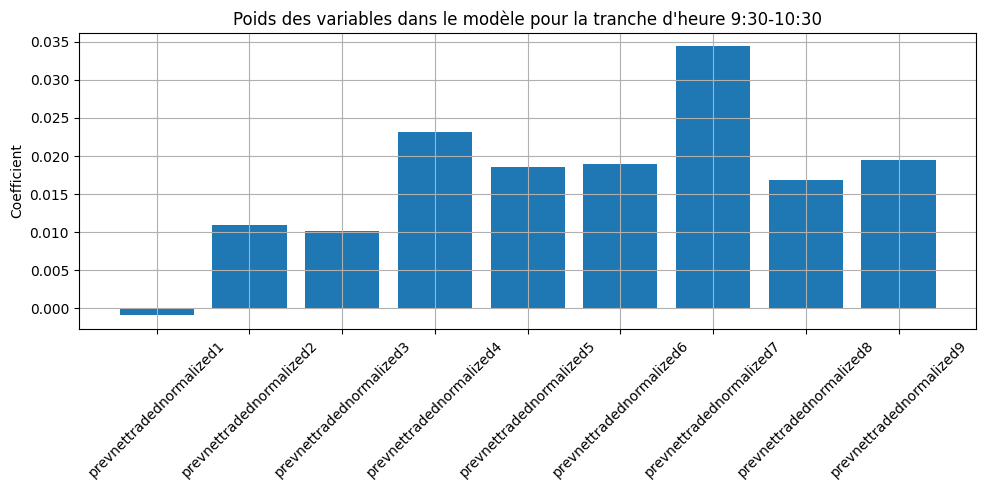

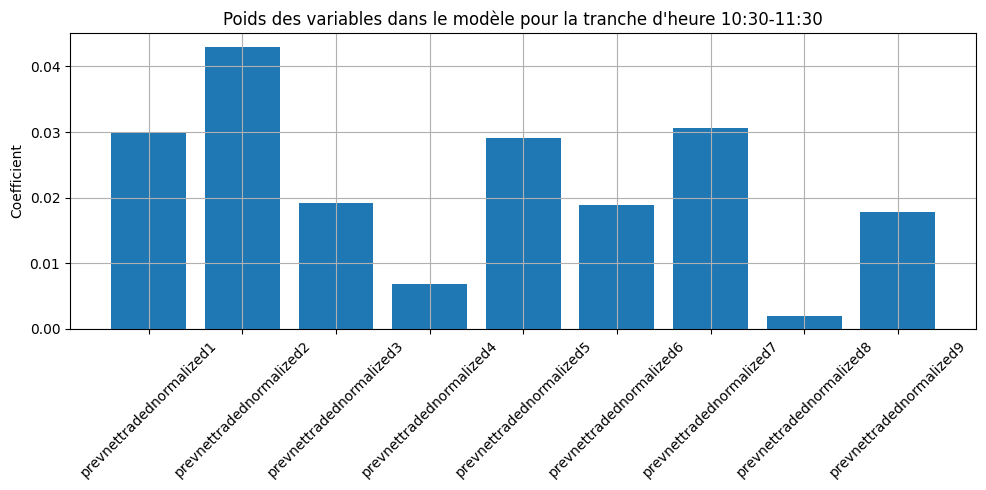

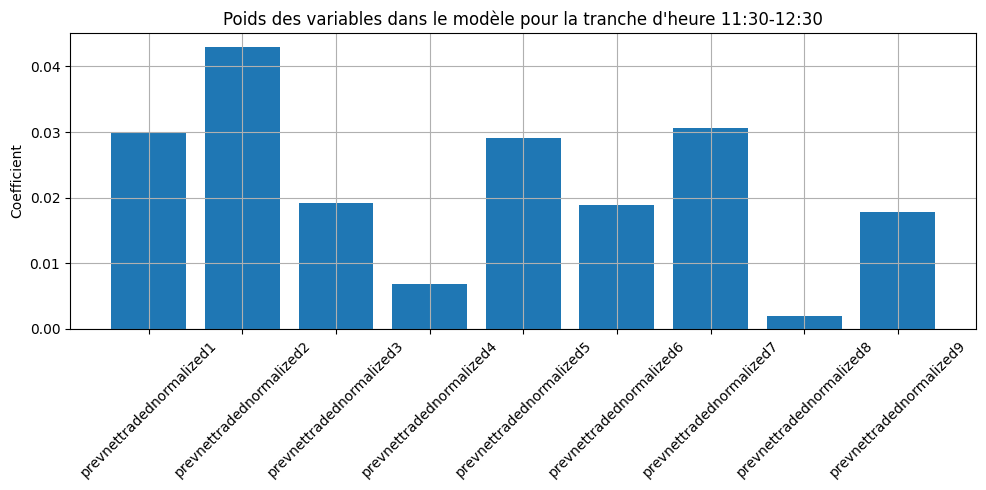

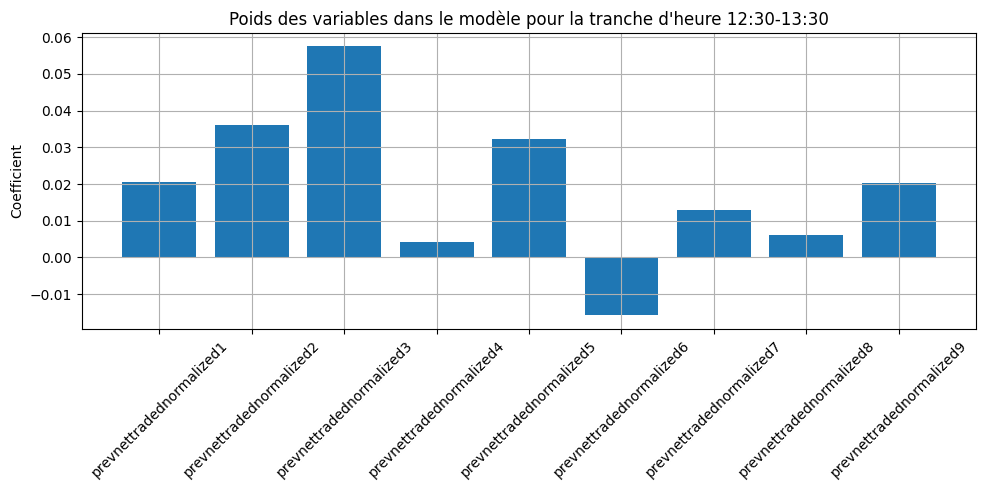

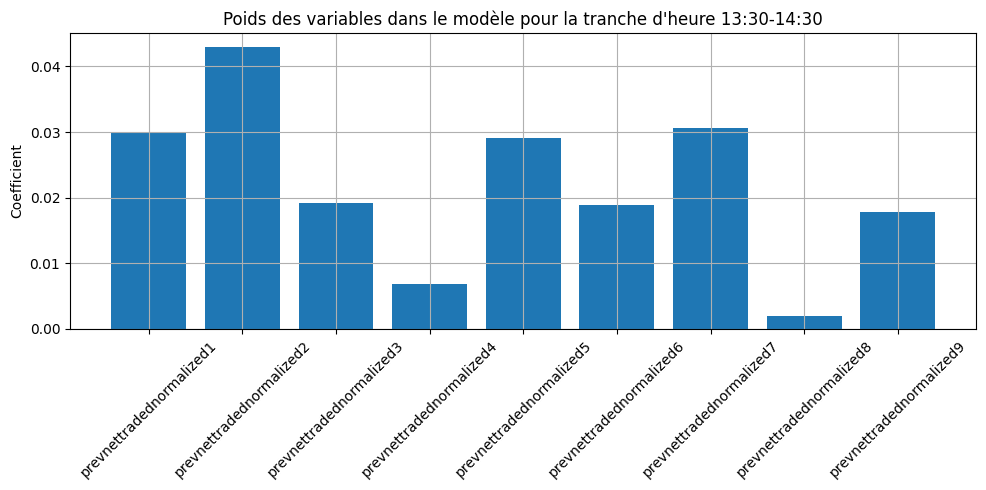

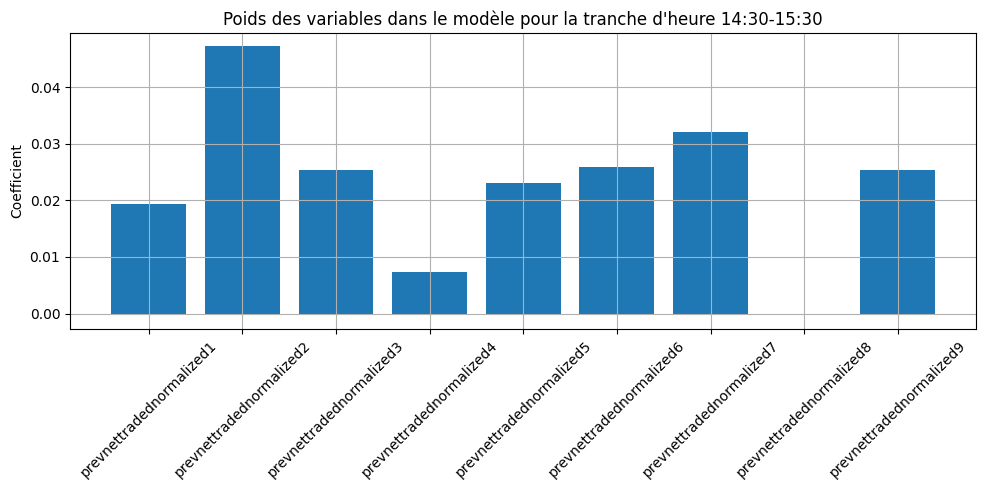

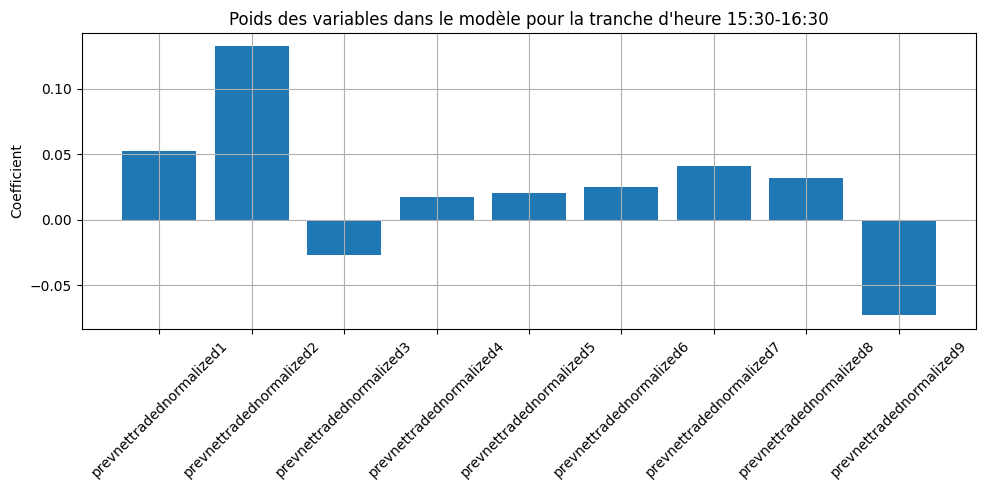

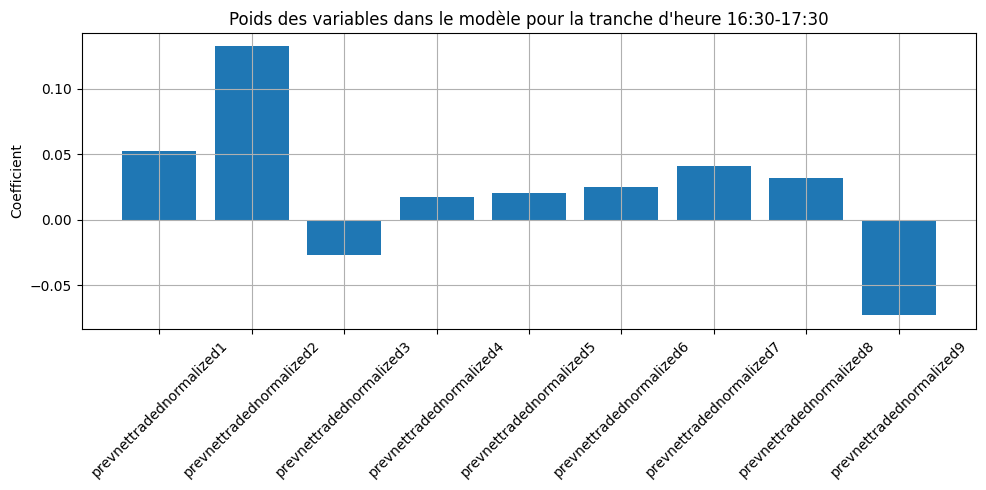

In [130]:
import matplotlib.pyplot as plt
import numpy as np
h = 9

for coefs in coefs_per_hour:
    features = X_train.columns if hasattr(X_train, 'columns') else [f'x{i}' for i in range(len(coefs))]

    plt.figure(figsize=(10, 5))
    plt.bar(features, coefs)
    plt.xticks(rotation=45)
    plt.ylabel("Coefficient")
    plt.title(f"Poids des variables dans le modèle pour la tranche d'heure {h}:30-{h+1}:30" )
    h +=1
    plt.grid(True)
    plt.tight_layout()
    plt.show()